<a href="https://colab.research.google.com/github/ChrisJavier/UIDE_3-WorkGroupProyects/blob/main/week_2/src/AMGD_CP_W2_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Trabajo 2: Ejercicio de Aplicacion Autónoma

## 📋 Información del Proyecto
- Autores:
  - CARRERA DIAZ CHRISTIAN JAVIER
  - CERNA PACHECO ROMEL MICHAEL
  - LUNA ARTEAGA ALEXANDER PAUL
- Versión: 1.0.0
- Licencia: MIT


🎯 Introducción:

Desarrollar habilidades prácticas en la adquisición, limpieza, transformación y análisis
inicial de datos utilizando Python y librerías como Pandas, integrando datos de fuentes
externas (APIs o datasets públicos). Para esto, se recomienda utilizar Google Colab que
permite escribir y ejecutar código Python en la nube, disponible mediante el navegador
web, e integrarlo con bloques de texto en formato Markdown para documentación
complementaria. Se debe presentar un solo documento tipo notebook en formato “ipynb”
y adjuntar los archivos que se soliciten en el desarrollo. El nombre del archivo a entregar
debe tener el siguiente formato: “AMGD_CP_W2_G#”, en donde ‘#’ es el número de grupo.

**🌍 Contexto del trabajo**

Los estudiantes deberán seleccionar un dataset público o una API de su interés
(preferiblemente relacionada con su área de estudio o trabajo). El objetivo es obtener datos
de esta fuente, realizar un proceso de limpieza y exploración inicial, y luego aplicar
transformaciones para obtener insights significativos

# 1️⃣ Fase 1: Selección de la Fuente de Datos (Investigación Inicial):

*******************************************************************************

##📌 **1.1. Justificación del proyecto**

Como parte de nuestro conjunto de datos decidimos realizar un analisis de los datos censales de poblacion del 2022 de Ecuador para validar diferente información que se puede conseguir y como cambió al día de hoy.

El análisis del dataset de vivienda del censo 2022 permite evaluar de forma objetiva las condiciones habitacionales de la población a partir de variables estructurales y de acceso a servicios básicos. Este tipo de información es clave para comprender la calidad de la vivienda, la disponibilidad de infraestructura y las diferencias territoriales.

Trabajar con esta tabla ofrece un alcance manejable y técnicamente sólido, ya que concentra indicadores físicos y de servicios del hogar, facilitando un análisis descriptivo claro. Además, el proyecto permite aplicar procesos de limpieza, exploración y análisis de datos sobre una fuente oficial, fortaleciendo competencias prácticas en analítica de datos aplicada.

## 🎯 **1.2. Objetivo general del proyecto**

Analizar el dataset censal de vivienda para describir las condiciones habitacionales y el acceso a servicios básicos mediante técnicas de análisis descriptivo de datos.

## ✅ **1.3. Objetivos específicos**

1️⃣ Examinar la estructura del dataset de vivienda y clasificar sus variables en componentes geográficos, físicos, de servicios y de composición del hogar.

2️⃣ Ejecutar el proceso de limpieza de datos, incluyendo detección de valores faltantes, registros inconsistentes, recodificaciones disponibles y estandarización de campos.

3️⃣ Preparar el dataset para el análisis mediante transformación de variables, validación de tipos de datos y generación de campos derivados cuando sea necesario.

4️⃣ Describir las características físicas de las viviendas (materiales, estado de techo, paredes, piso y número de cuartos) para construir indicadores básicos de calidad habitacional.

5️⃣ Evaluar la disponibilidad de servicios básicos (agua, saneamiento, energía eléctrica y eliminación de basura) para estimar niveles de cobertura.

6️⃣ Generar tablas y visualizaciones descriptivas que permitan identificar patrones de vivienda por zona y tipo de área (urbana/rural).

## 🔗 1.4. Enlaces del Dataset que se usaran

La información usada esta en la pagina oficial del INEC https://www.censoecuador.gob.ec/data-censo-ecuador/ que nos ofrece el dataset con todos sus complementos como la encuenta realizada, el diccionario de datos, etc.

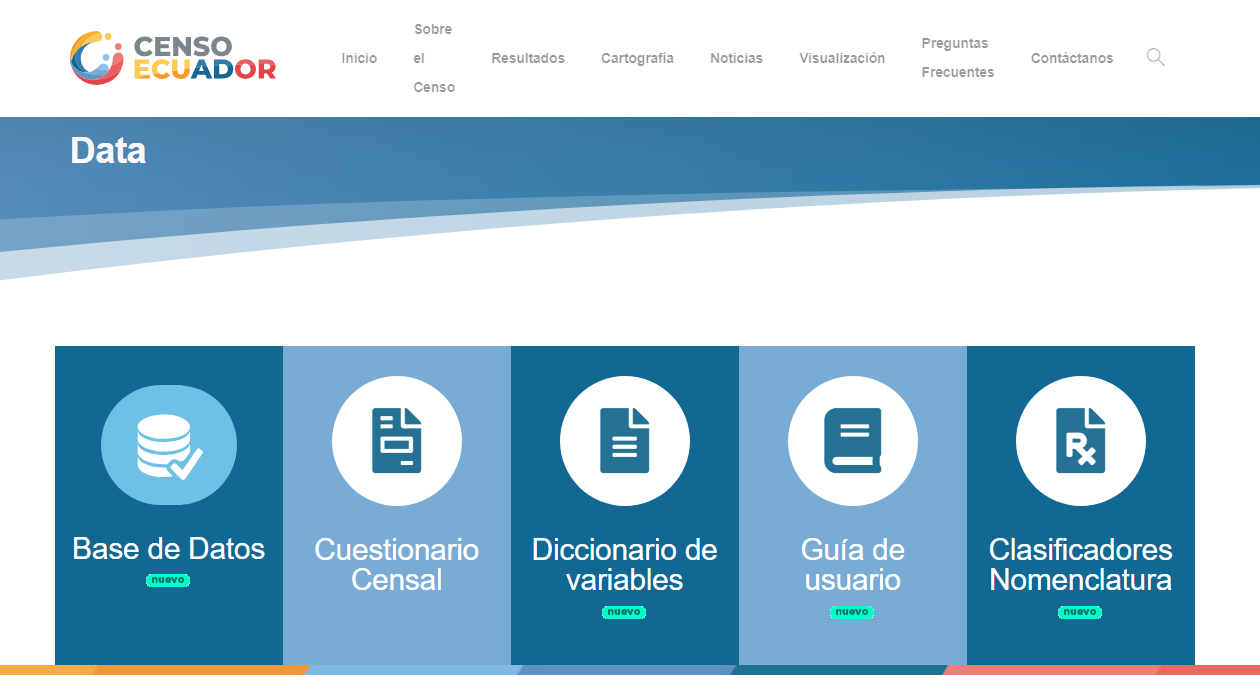

- Dataset del censo poblacional 2022: https://www.ecuadorencifras.gob.ec/documentos/web-inec/bd-censo/sector/BDD_CPV2022_SECT_CSV.zip
- Nombres de columnas: https://github.com/ChrisJavier/UIDE_3-WorkGroupProyects/raw/refs/heads/main/week_2/src/columnas_dataset.csv
- Nombres de parroquias: https://raw.githubusercontent.com/ChrisJavier/UIDE_3-WorkGroupProyects/refs/heads/main/week_2/src/parroquias.csv


Nota:
- El dataset tiene un peso de mas o menos de 5 GB pero como solo usaremos una parte del dataset que solo es parte de la categoria de Vivienda. El resto lo borraremos para que no almacene espacio dentro del Colab.
- Algunos de los archivos CSV que estan en los enlaces son del previo procesamiento de los archivos excel que tiene el dataset por ello debiamos crearlos a parte para que puedan usarse en el pryecto.



#2️⃣ Fase 2: Adquisición de Datos:


## 🚀 2.1. Descarga del dataset

El dataset del censo de población esta situado en un zip con todas las categorias del censo.

image.png

Por ello, se debe realizar la descompresión del zip y empartar el documento de excel de diccionario de datos con la base de datos.

Se debe considerar que en la base de datos la mayoria de los datos estan distribuidos por números por las opciones de la encuesta realizada. Luego refinaremos la base de datos para colocar los valores de la encuenta para poder realizar más detallada la información

📥 Este código descarga un archivo zip y seleccionamos el dataset de vivienda del censo. Tambien agregamos las columnas a un nombre facil de entender para poder realizar el analisis.

In [133]:
 # importacion de la libreria os que permite interactuar con el sistema operativo (archivos y rutas)

import os

# Define el nombre del archivo comprimido que se descargará
compressed_file_path = 'dataset.zip'
population_file_path = 'BDD_VIV_CPV2022_SECT.csv'

# Descarga el archivo comprimido del dataset del censo poblacional del citio oficial
# El archivo se guarda en el entorno de trabajo actual y valido que si existe no lo descargue de nuevo

if not os.path.exists(compressed_file_path) and not os.path.exists(population_file_path):
  !wget 'https://www.ecuadorencifras.gob.ec/documentos/web-inec/bd-censo/sector/BDD_CPV2022_SECT_CSV.zip' -O '{compressed_file_path}'
  # Descomprimimos el archivo compress file path especificamente
  !unzip -o '{compressed_file_path}' -d .
  # Eliminamos los archivos que no usaremos
  !rm '{compressed_file_path}'

📥 Importa la librería Pandas para la manipulación y análisis de datos.

In [134]:
import pandas as pd

**Lista de descripción de las opciones del contenido de la encuesta**

En esta sección se creo las listas de los valores de las columnas de la base de datos descargas.

Adicional, el dataset se compone de 6 millones de registros los limitaremos a 1 millon para este proyecto.

In [135]:
# Lista de datos de la base de datos actual
# Columna I01
provincias = {"01":"AZUAY","02":"BOLÍVAR","03":"CAÑAR","04":"CARCHI","05":"COTOPAXI","06":"CHIMBORAZO","07":"EL ORO","08":"ESMERALDAS","09":"GUAYAS","10":"IMBABURA","11":"LOJA","12":"LOS RÍOS","13":"MANABÍ","14":"MORONA SANTIAGO","15":"NAPO","16":"PASTAZA","17":"PICHINCHA","18":"TUNGURAHUA","19":"ZAMORA CHINCHIPE","20":"GALÁPAGOS","21":"SUCUMBÍOS","22":"ORELLANA","23":"SANTO DOMINGO DE LOS TSÁCHILAS","24":"SANTA ELENA"}
# Columna I02
cantones = {"0101":"CUENCA","0102":"GIRÓN","0103":"GUALACEO","0104":"NABÓN","0105":"PAUTE","0106":"PUCARÁ","0107":"SAN FERNANDO","0108":"SANTA ISABEL","0109":"SÍGSIG","0110":"OÑA","0111":"CHORDELEG","0112":"EL PAN","0113":"SEVILLA DE ORO","0114":"GUACHAPALA","0115":"CAMILO PONCE ENRÍQUEZ","0201":"GUARANDA","0202":"CHILLANES","0203":"CHIMBO","0204":"ECHEANDÍA","0205":"SAN MIGUEL","0206":"CALUMA","0207":"LAS NAVES","0301":"AZOGUES","0302":"BIBLIÁN","0303":"CAÑAR","0304":"LA TRONCAL","0305":"EL TAMBO","0306":"DÉLEG","0307":"SUSCAL","0401":"TULCÁN","0402":"BOLÍVAR","0403":"ESPEJO","0404":"MIRA","0405":"MONTÚFAR","0406":"SAN PEDRO DE HUACA","0501":"LATACUNGA","0502":"LA MANÁ","0503":"PANGUA","0504":"PUJILÍ","0505":"SALCEDO","0506":"SAQUISILÍ","0507":"SIGCHOS","0601":"RIOBAMBA","0602":"ALAUSÍ","0603":"COLTA","0604":"CHAMBO","0605":"CHUNCHI","0606":"GUAMOTE","0607":"GUANO","0608":"PALLATANGA","0609":"PENIPE","0610":"CUMANDÁ","0701":"MACHALA","0702":"ARENILLAS","0703":"ATAHUALPA","0704":"BALSAS","0705":"CHILLA","0706":"EL GUABO","0707":"HUAQUILLAS","0708":"MARCABELÍ","0709":"PASAJE","0710":"PIÑAS","0711":"PORTOVELO","0712":"SANTA ROSA","0713":"ZARUMA","0714":"LAS LAJAS","0801":"ESMERALDAS","0802":"ELOY ALFARO","0803":"MUISNE","0804":"QUININDÉ","0805":"SAN LORENZO","0806":"ATACAMES","0807":"RIOVERDE","0901":"GUAYAQUIL","0902":"ALFREDO BAQUERIZO MORENO (JUJAN)","0903":"BALAO","0904":"BALZAR","0905":"COLIMES","0906":"DAULE","0907":"DURÁN","0908":"EL EMPALME","0909":"EL TRIUNFO","0910":"MILAGRO","0911":"NARANJAL","0912":"NARANJITO","0913":"PALESTINA","0914":"PEDRO CARBO","0916":"SAMBORONDÓN","0918":"SANTA LUCÍA","0919":"SALITRE","0920":"SAN JACINTO DE YAGUACHI","0921":"PLAYAS","0922":"SIMÓN BOLÍVAR","0923":"CORONEL MARCELINO MARIDUEÑA","0924":"LOMAS DE SARGENTILLO","0925":"NOBOL","0927":"GENERAL ANTONIO ELIZALDE","0928":"ISIDRO AYORA","1001":"IBARRA","1002":"ANTONIO ANTE","1003":"COTACACHI","1004":"OTAVALO","1005":"PIMAMPIRO","1006":"SAN MIGUEL DE URCUQUÍ","1101":"LOJA","1102":"CALVAS","1103":"CATAMAYO","1104":"CELICA","1105":"CHAGUARPAMBA","1106":"ESPÍNDOLA","1107":"GONZANAMÁ","1108":"MACARÁ","1109":"PALTAS","1110":"PUYANGO","1111":"SARAGURO","1112":"SOZORANGA","1113":"ZAPOTILLO","1114":"PINDAL","1115":"QUILANGA","1116":"OLMEDO","1201":"BABAHOYO","1202":"BABA","1203":"MONTALVO","1204":"PUEBLOVIEJO","1205":"QUEVEDO","1206":"URDANETA","1207":"VENTANAS","1208":"VINCES","1209":"PALENQUE","1210":"BUENA FE","1211":"VALENCIA","1212":"MOCACHE","1213":"QUINSALOMA","1301":"PORTOVIEJO","1302":"BOLÍVAR","1303":"CHONE","1304":"EL CARMEN","1305":"FLAVIO ALFARO","1306":"JIPIJAPA","1307":"JUNÍN","1308":"MANTA","1309":"MONTECRISTI","1310":"PAJÁN","1311":"PICHINCHA","1312":"ROCAFUERTE","1313":"SANTA ANA","1314":"SUCRE","1315":"TOSAGUA","1316":"24 DE MAYO","1317":"PEDERNALES","1318":"OLMEDO","1319":"PUERTO LÓPEZ","1320":"JAMA","1321":"JARAMIJÓ","1322":"SAN VICENTE","1401":"MORONA","1402":"GUALAQUIZA","1403":"LIMÓN INDANZA","1404":"PALORA","1405":"SANTIAGO","1406":"SUCÚA","1407":"HUAMBOYA","1408":"SAN JUAN BOSCO","1409":"TAISHA","1410":"LOGROÑO","1411":"PABLO SEXTO","1412":"TIWINTZA","1501":"TENA","1503":"ARCHIDONA","1504":"EL CHACO","1507":"QUIJOS","1509":"CARLOS JULIO AROSEMENA TOLA","1601":"PASTAZA","1602":"MERA","1603":"SANTA CLARA","1604":"ARAJUNO","1701":"DISTRITO METROPOLITANO DE QUITO","1702":"CAYAMBE","1703":"MEJÍA","1704":"PEDRO MONCAYO","1705":"RUMIÑAHUI","1707":"SAN MIGUEL DE LOS BANCOS","1708":"PEDRO VICENTE MALDONADO","1709":"PUERTO QUITO","1801":"AMBATO","1802":"BAÑOS DE AGUA SANTA","1803":"CEVALLOS","1804":"MOCHA","1805":"PATATE","1806":"QUERO","1807":"SAN PEDRO DE PELILEO","1808":"SANTIAGO DE PÍLLARO","1809":"TISALEO","1901":"ZAMORA","1902":"CHINCHIPE","1903":"NANGARITZA","1904":"YACUAMBI","1905":"YANTZAZA","1906":"EL PANGUI","1907":"CENTINELA DEL CÓNDOR","1908":"PALANDA","1909":"PAQUISHA","2001":"SAN CRISTÓBAL","2002":"ISABELA","2003":"SANTA CRUZ","2101":"LAGO AGRIO","2102":"GONZALO PIZARRO","2103":"PUTUMAYO","2104":"SHUSHUFINDI","2105":"SUCUMBÍOS","2106":"CASCALES","2107":"CUYABENO","2201":"FRANCISCO DE ORELLANA","2202":"AGUARICO","2203":"LA JOYA DE LOS SACHAS","2204":"LORETO","2301":"SANTO DOMINGO","2302":"LA CONCORDIA","2401":"SANTA ELENA","2402":"LA LIBERTAD","2403":"SALINAS"}
# Columna I03

if not os.path.exists('parroquias.csv'):
  !wget https://raw.githubusercontent.com/ChrisJavier/UIDE_3-WorkGroupProyects/refs/heads/main/week_2/src/parroquias.csv -O parroquias.csv

parroquias = pd.read_csv('parroquias.csv',sep=';',encoding='utf-8')
parroquias.head()

# Creamos el diccionario de parroquias

parroquias['CODIGO'] = parroquias['CODIGO'].astype(str).str.zfill(6)
parroquias = dict(zip(parroquias['CODIGO'],parroquias['DESCRIPCION']))

# Cargar Descripcion de las columnas
if not os.path.exists('columnas_dataset.csv'):
  !wget https://github.com/ChrisJavier/UIDE_3-WorkGroupProyects/raw/refs/heads/main/week_2/src/columnas_dataset.csv -O columnas_dataset.csv

columns_name = pd.read_csv('columnas_dataset.csv',sep='|',encoding='utf-8')
print(f'Imprimimos el nombre de las columnas {columns_name['NOMBREDELAVARIABLE'].tolist()}')

# Colocamos el nombre de las columnas en minusculas para evitar errores

columns_name['NOMBREDELAVARIABLE'] = (columns_name['CODIGODEVARIABLE'] + '_'+ columns_name['NOMBREDELAVARIABLE']).str.lower().str[:20]

# Cargamos el dataset de vivienda con la limitacion de 1 millon de registros

df = pd.read_csv(population_file_path,sep=';',encoding='utf-8', nrows=1000000)

# Cambiamos los tipos de datos de las columnas
df = df.astype({'I01': 'str', 'I02': 'str', 'I03': 'str', 'I04': 'str',
                'I05': 'str', 'I10': 'str', 'CANTON': 'str', 'PARROQ': 'str',
                'ID_VIV': 'str'})
# Cambiamos el nombre de las columnas y lo formateamos
maper = dict(zip(columns_name['CODIGODEVARIABLE'], columns_name['NOMBREDELAVARIABLE']))
df = df.rename(columns=maper)
df.info()



Imprimimos el nombre de las columnas ['Provincia', 'IdentificadordeCanton', 'IdentificadordeParroquia', 'Zona', 'Sector', 'Numerodevivienda', 'Tipodevia', 'Tipodevivienda', 'Condiciondeocupaciondeviviendaparticular', 'Condiciondeocupaciondeviviendacolectiva', 'Materialpredominantedeltechoocubierta', 'Estadodeltechoocubierta', 'Materialpredominantedelasparedesexteriores', 'Estadodelasparedesexteriores', 'Materialpredominantedelpiso', 'Estadodelpiso', 'Elaguaquerecibelaviviendaes', 'Elaguaquerecibelaviviendaprovieneoesuministradapor', 'Elserviciohigienicodelaviviendaes', 'Disponibilidaddeenergiaelectricaporredpublica', 'Disponibilidaddeotrafuentedeenergiaelectrica', 'Eliminaciondelabasura', 'Numerodecuartos', 'Todaslaspersonascompartenunmismogastoparalaalimentacion', 'Numerodehogares', 'Areaurbanaorural', 'Canton', 'Cabeceracantonaloparroquiarural', 'Identificadordelavivienda', 'Totaldefallecidosdelavivienda', 'Totaldeemigrantesdelavivienda', 'Totaldepersonasdelavivienda', 'Condiciondeoc

## 🚀 2.2. Previsualizacion y validacion

📥 Carga el dataset desde un archivo CSV comprimido, valida que tenga al menos 10.000 registros y muestra un resumen estadístico de sus columnas numéricas.

In [136]:
# Valida que el dataset tenga al menos 10.000 registros, como solicita el ejercicio
if df.shape[0] < 10000:
    # Lanza una excepción si no se cumple el mínimo de registros
    raise Exception
else:
  # Muestra un mensaje de confirmación si el dataset es válido
  print(f'Dataset validado, el dataset contiene {df.shape[0]} registros \n')

# Muestra un resumen estadístico de las columnas numéricas del dataset
df.describe()

Dataset validado, el dataset contiene 1000000 registros 



,d01_tipodevia,v01_tipodevivienda,v0201_condiciondeocu,v0202_condiciondeocu,v03_materialpredomin,v04_estadodeltechooc,v05_materialpredomin,v06_estadodelaspared,v07_materialpredomin,v08_estadodelpiso,v09_elaguaquerecibel,v10_elaguaquerecibel,v11_elserviciohigien,v12_disponibilidadde,v13_disponibilidadde,v14_eliminaciondelab,v15_numerodecuartos,v16_todaslaspersonas,v17_numerodehogares,aur_areaurbanaorural,totfall_totaldefalle,totemi_totaldeemigra,totper_totaldeperson,v0201r_condiciondeoc,v15r_numerodecuartos,def_hab_deficithabit,imp_vopa_registroimp
count,1000000.000000,1000000.000000,997586.000000,2348.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,680247.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,997586.000000,680247.000000,680247.000000,1000000.000000
mean,3.074715,1.651223,1.844343,1.775128,2.177543,1.643394,2.236895,1.589815,3.141794,1.604845,1.357833,1.699234,1.785641,1.025231,4.837164,1.688381,3.355552,1.024647,1.028213,1.557446,0.036004,0.040970,2.270476,1.504183,3.286168,1.604589,1.978000
std,2.479745,1.298348,1.250376,0.417587,1.046591,0.687346,0.933475,0.643322,1.741663,0.666489,0.705056,1.061273,1.500966,0.156825,0.786075,1.162150,1.649947,0.155047,0.190161,0.496689,0.196285,0.283181,4.920974,0.820748,1.465332,0.729891,0.146683
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000
50%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000
75%,6.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,2.000000,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,4.000000,2.000000,4.000000,2.000000,2.000000
max,8.000000,19.000000,5.000000,2.000000,6.000000,3.000000,8.000000,3.000000,8.000000,3.000000,4.000000,5.000000,7.000000,2.000000,5.000000,7.000000,20.000000,2.000000,9.000000,2.000000,7.000000,15.000000,4144.000000,4.000000,6.000000,3.000000,2.000000


## 🚀 2.3. Transformacion de datos

🔍 Cambio de valores de las primeras tres columnas con los valores de la columnas provincia, canton y parroquia

In [137]:
# Valor a reemplazar los valores de las primeras 3 columnas con los valores de la columnas provincia, canton y parroquia

# Le vamos aniadir un 0 a la izquierda a la columna para completar los 2 caracters
df['i01_provincia'] = df['i01_provincia'].str.zfill(2)

# Repetimos el proceso con canton pero tambien concatenamos el valor de la primera columna
df['i02_identificadordec'] = df['i02_identificadordec'].str.zfill(2)
df['i02_identificadordec'] = df['i01_provincia'] + df['i02_identificadordec']
df['canton_canton'] = df['canton_canton'].str.zfill(4)

# Repetimos el proceso con parroquia pero tambien concatenamos el valor de provincia, canton, parroquia

df['i03_identificadordep'] = df['i03_identificadordep'].str.zfill(2)
df['i03_identificadordep'] = df['i02_identificadordec'] + df['i03_identificadordep']
df['parroq_cabeceracanto'] = df['parroq_cabeceracanto'].str.zfill(6)

# Mapeamos los valores para cada columna

df['i01_provincia'] = df['i01_provincia'].map(provincias)
df['i02_identificadordec'] = df['i02_identificadordec'].map(cantones)
df['i03_identificadordep'] = df['i03_identificadordep'].map(parroquias)
df['parroq_cabeceracanto'] = df['parroq_cabeceracanto'].map(parroquias)
df['canton_canton'] = df['canton_canton'].map(cantones)

# Visualización general del dataframe de los 10 primeros registros
df.head(10)

,i01_provincia,i02_identificadordec,i03_identificadordep,i04_zona,i05_sector,i10_numerodevivienda,d01_tipodevia,v01_tipodevivienda,v0201_condiciondeocu,v0202_condiciondeocu,v03_materialpredomin,v04_estadodeltechooc,v05_materialpredomin,v06_estadodelaspared,v07_materialpredomin,v08_estadodelpiso,v09_elaguaquerecibel,v10_elaguaquerecibel,v11_elserviciohigien,v12_disponibilidadde,v13_disponibilidadde,v14_eliminaciondelab,v15_numerodecuartos,v16_todaslaspersonas,v17_numerodehogares,aur_areaurbanaorural,canton_canton,parroq_cabeceracanto,id_viv_identificador,totfall_totaldefalle,totemi_totaldeemigra,totper_totaldeperson,v0201r_condiciondeoc,v15r_numerodecuartos,def_hab_deficithabit,imp_vopa_registroimp
0,AZUAY,CUENCA,CUENCA,1,1,1,2,1,1.0,NaN,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,4.0,1.0,1.0,1,CUENCA,CUENCA,101500010010001,0,0,5,1.0,4.0,1.0,2
1,AZUAY,CUENCA,CUENCA,1,1,2,1,2,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,1,CUENCA,CUENCA,101500010010002,0,0,3,1.0,5.0,1.0,2
2,AZUAY,CUENCA,CUENCA,1,1,3,1,1,1.0,NaN,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1,CUENCA,CUENCA,101500010010003,0,0,1,1.0,3.0,2.0,2
3,AZUAY,CUENCA,CUENCA,1,1,4,1,1,1.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,5.0,1.0,1.0,1,CUENCA,CUENCA,101500010010004,0,1,2,1.0,5.0,1.0,2
4,AZUAY,CUENCA,CUENCA,1,1,5,1,1,1.0,NaN,3.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1,CUENCA,CUENCA,101500010010005,0,0,4,1.0,5.0,2.0,2
5,AZUAY,CUENCA,CUENCA,1,1,6,1,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,CUENCA,CUENCA,101500010010006,0,0,0,3.0,NaN,NaN,2
6,AZUAY,CUENCA,CUENCA,1,1,7,1,1,1.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1,CUENCA,CUENCA,101500010010007,0,0,4,1.0,4.0,1.0,2
7,AZUAY,CUENCA,CUENCA,1,1,8,1,1,1.0,NaN,4.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,12.0,1.0,1.0,1,CUENCA,CUENCA,101500010010008,0,0,2,1.0,6.0,2.0,2
8,AZUAY,CUENCA,CUENCA,1,1,9,1,1,1.0,NaN,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,7.0,1.0,1.0,1,CUENCA,CUENCA,101500010010009,0,0,4,1.0,6.0,1.0,2
9,AZUAY,CUENCA,CUENCA,1,1,10,1,1,1.0,NaN,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1,CUENCA,CUENCA,101500010010010,1,1,2,1.0,5.0,1.0,2


In [138]:
# Creamos el conteo de la jerarquía geográfica
verificacion_geo = df[['i01_provincia', 'i02_identificadordec', 'i03_identificadordep']].value_counts().reset_index()

# Renombramos las columnas para que el reporte sea claro
verificacion_geo.columns = ['Provincia', 'Cantón', 'Parroquia', 'Total_Registros']

# Mostramos las primeras 10 combinaciones con un estilo limpio
print("Verificación de Cobertura Geográfica (Top 10 localidades con más registros):")
display(verificacion_geo.head(10).style.hide(axis='index').background_gradient(cmap='Blues', subset=['Total_Registros']))

Verificación de Cobertura Geográfica (Top 10 localidades con más registros):


Provincia,Cantón,Parroquia,Total_Registros
AZUAY,CUENCA,CUENCA,146306
CHIMBORAZO,RIOBAMBA,RIOBAMBA,88165
COTOPAXI,LATACUNGA,LATACUNGA,51074
BOLÍVAR,GUARANDA,GUARANDA,27784
CARCHI,TULCÁN,TULCÁN,23688
CAÑAR,LA TRONCAL,LA TRONCAL,21604
COTOPAXI,LA MANÁ,LA MANÁ,18900
CAÑAR,AZOGUES,AZOGUES,18213
COTOPAXI,PUJILÍ,PUJILÍ,17624
COTOPAXI,SALCEDO,SAN MIGUEL,15797


# 3️⃣ Fase 3: Limpieza y Exploración Inicial (Análisis Exploratorio de Datos - EDA):


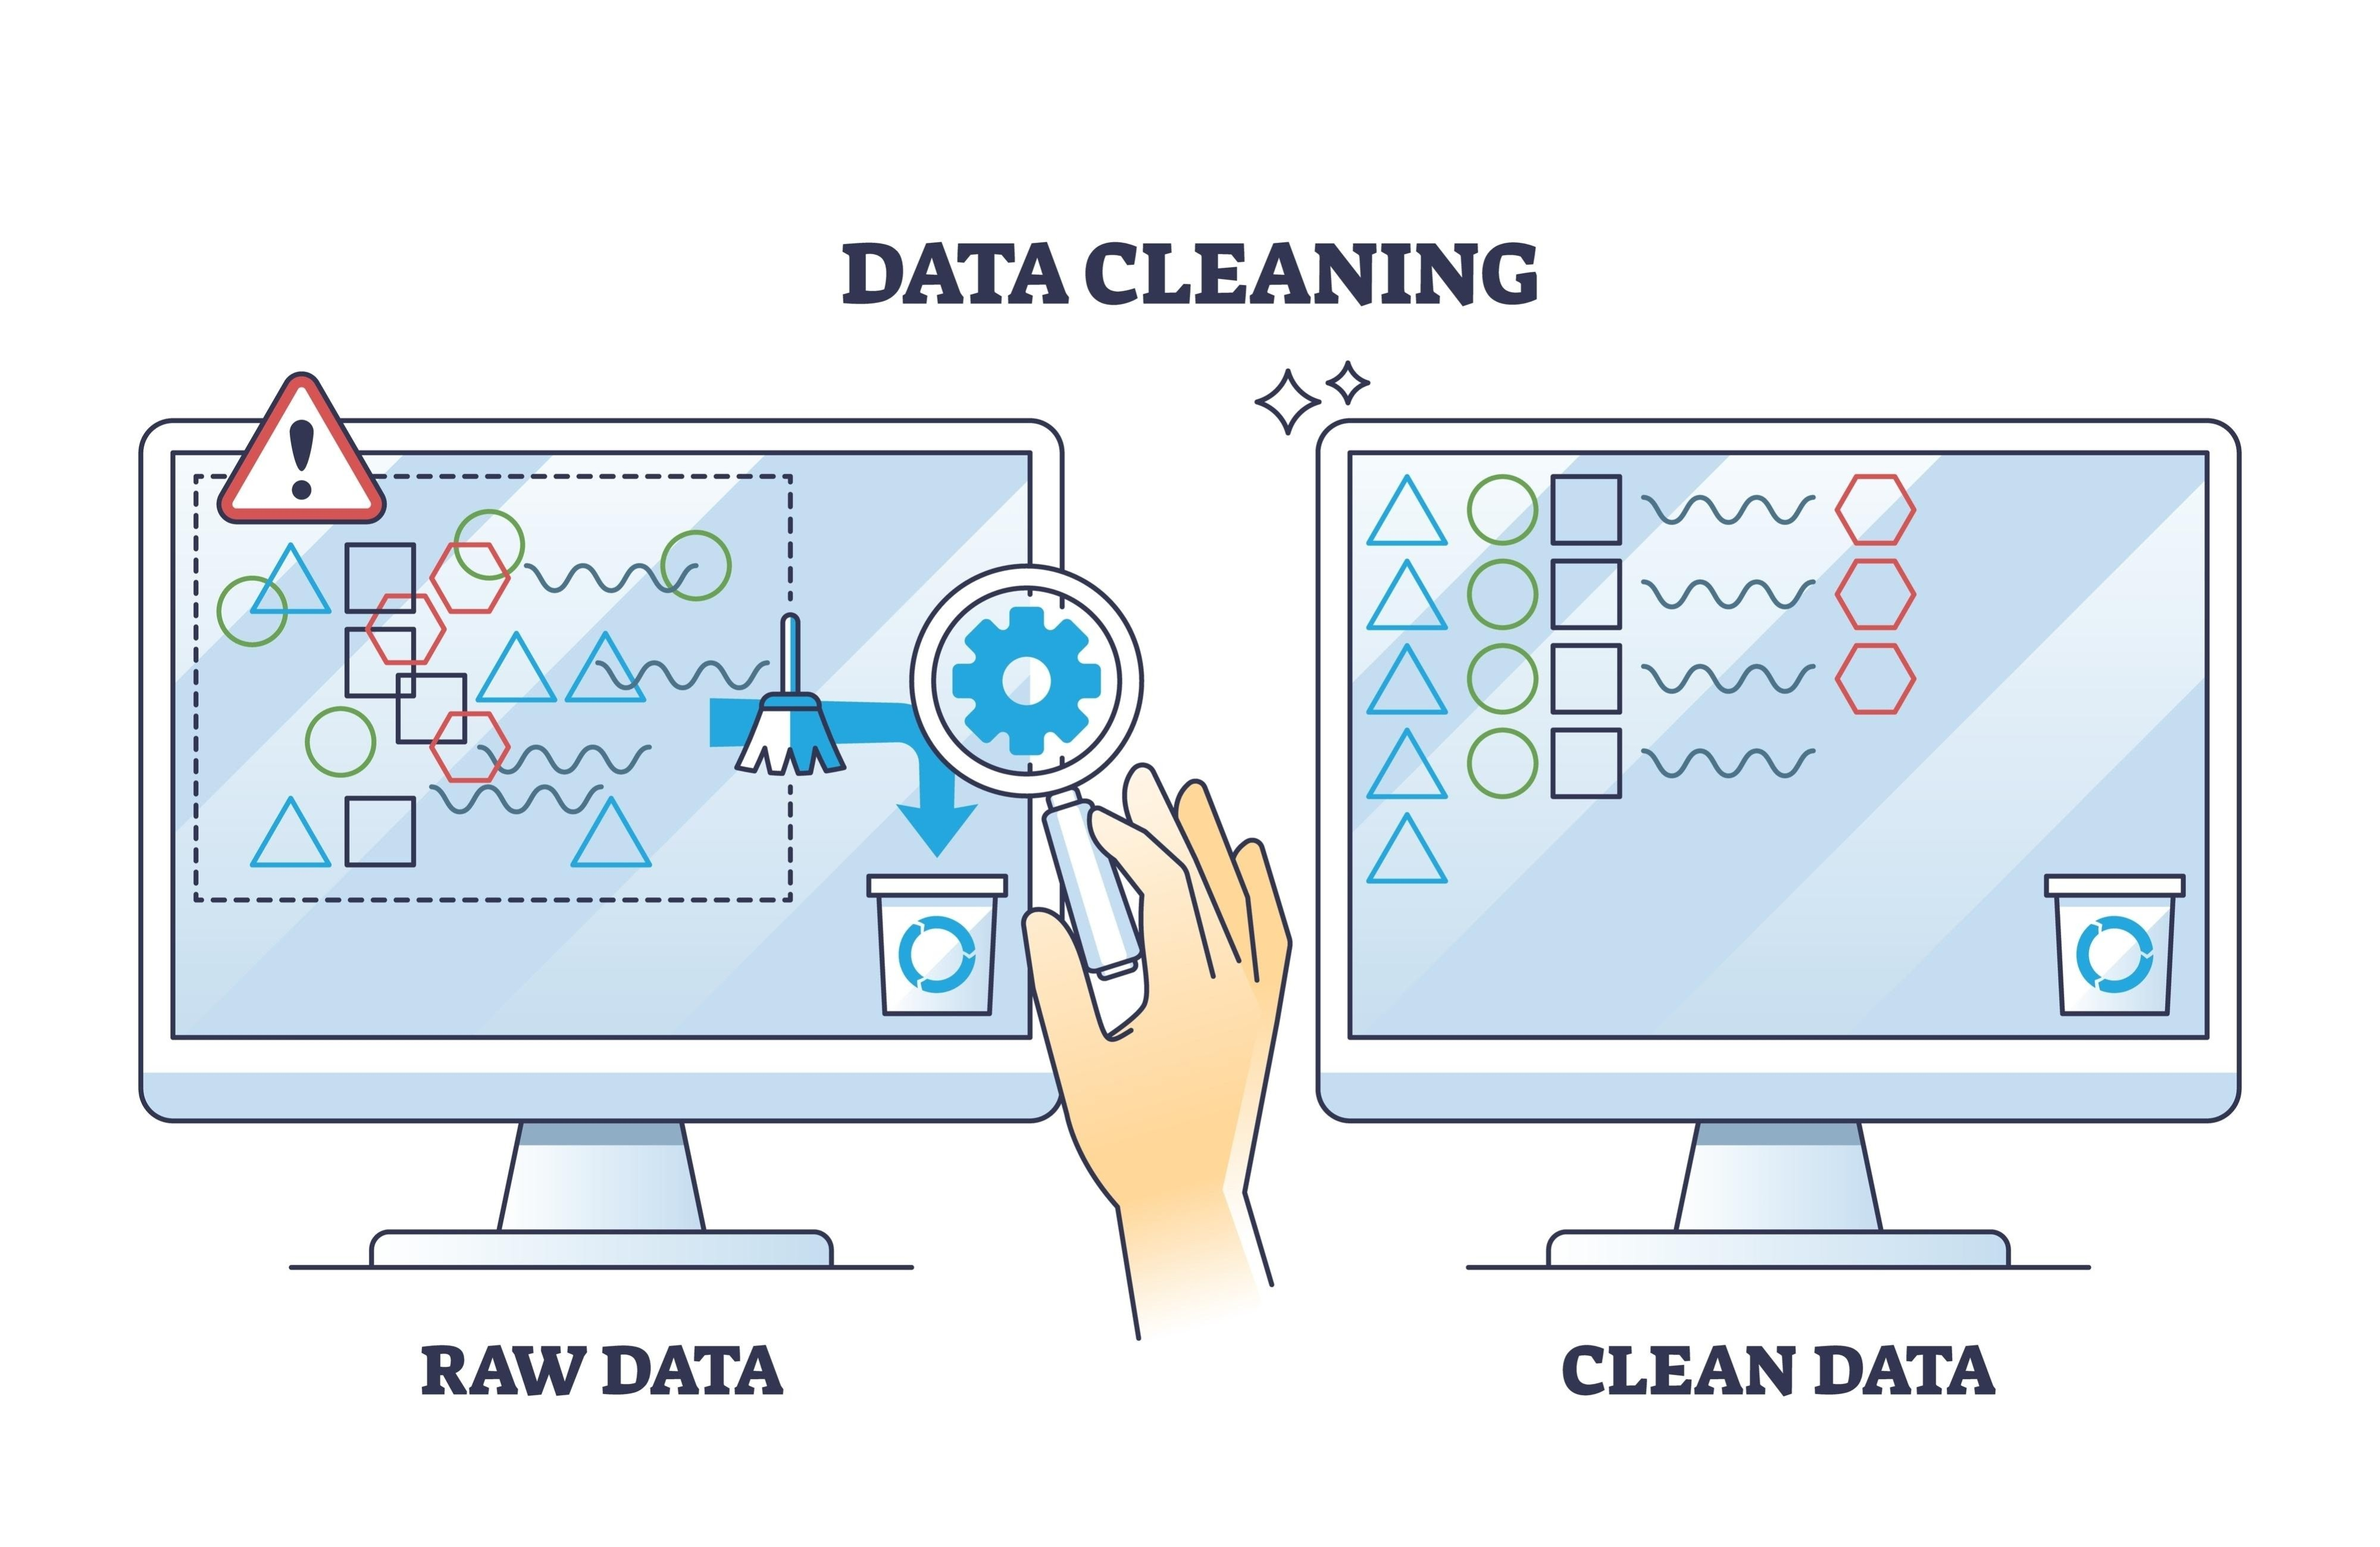

### 🚀 3.1. Tratamiento de Valores Nulos
Para garantizar que el análisis sea estadísticamente significativo y técnicamente eficiente, se han aplicado las siguientes reglas de procesamiento sobre el dataset del Censo 2022:

Identificar las columnas que presentan más del 30 % de valores nulos para decidir su eliminación.
En el caso de columnas críticas con pocos valores faltantes, se realiza la imputación de datos.

El código **analiza los valores nulos**, elimina las columnas con **más del 30 % de datos faltantes** y muestra un **comparativo del número de columnas antes y después** del proceso de limpieza.


In [139]:
# Obtiene el número total de columnas del DataFrame original
total_columnas_antes = df.shape[1]
total_columnas_antes  # Muestra el total de columnas antes del tratamiento

# Calcula el porcentaje de valores nulos por cada columna
nulos = (
    df.isna()          # Identifica valores nulos (NaN)
      .mean()          # Calcula la proporción de nulos por columna
      .mul(100)        # Convierte la proporción a porcentaje
      .round(2)        # Redondea a 2 decimales
      .reset_index()   # Convierte el índice en una columna
)

# Renombra las columnas del DataFrame resultante
nulos.columns = ['Columna', 'Porcentaje_nulos']

# Selecciona las columnas que tienen más del 30% de valores nulos
columnas_mayor_30 = (
    nulos[nulos['Porcentaje_nulos'] > 30]['Columna']
    .tolist()          # Convierte los nombres de columnas a una lista
)

# Elimina del DataFrame las columnas con más del 30% de nulos
df_reducido = df.drop(columns=columnas_mayor_30)

# Obtiene el total de columnas después de eliminar las columnas con muchos nulos
total_columnas_despues = df_reducido.shape[1]
total_columnas_despues  # Muestra el total de columnas después del tratamiento

# Crea un DataFrame resumen con el antes y después del tratamiento de columnas
resumen_columnas = pd.DataFrame({
    'Estado': ['Antes del tratamiento', 'Después del tratamiento'],
    'Total_columnas': [total_columnas_antes, total_columnas_despues]
})

# Muestra el resumen final
resumen_columnas


,Estado,Total_columnas
0,Antes del tratamiento,36
1,Después del tratamiento,18


Luego de validar, nos dimos cuenta que necesitaremos la columna "numerodecuartos" por ello se llenará esa pero se eliminara la columna "numerodehogares"

### Filtrado por Umbral de Nulos (30%)
Se decidió eliminar automáticamente cualquier columna que presentara más del 30% de valores ausentes.
###¿Por qué?:
Una columna con un alto índice de nulos introduce sesgos y reduce la confiabilidad de cualquier modelo o gráfico. Al superar el 30%, la cantidad de datos "inventados" o imputados necesarios para rellenar los huecos deformaría la realidad estadística de la población ecuatoriana.

### Reducción de Dimensionalidad
El paso de total_columnas_antes a total_columnas_despues no es solo una limpieza, es una optimización.
### ¿Por qué?:
Trabajar con un DataFrame más ligero permite que las operaciones en Python sean más rápidas y que el enfoque del análisis se mantenga en las variables que realmente tienen información completa y útil (como acceso a servicios básicos o ubicación).

In [140]:
# Vamos a validar las columnas que se eliminaran

print(f'Las columnas que se eliminaran son: {columnas_mayor_30}')

# Luego de validar, nos dimos cuenta que necesitaremos la columna "numerodecuartos" por ello se llenará esa pero se eliminara la columna "numerodehogares"

df['v15_numerodecuartos'] = (
    df['v15_numerodecuartos']
        .fillna(df['v17_numerodehogares'].mean())
        .abs()
)

if 'v17_numerodehogares' in df.columns:
  df = df.drop(columns=['v17_numerodehogares'])

# Convertimos a entero la columna numerodehogares

df['v15_numerodecuartos'] = df['v15_numerodecuartos'].astype(int)

# Validamos los datos con su descripción

df.info()


Las columnas que se eliminaran son: ['v0202_condiciondeocu', 'v03_materialpredomin', 'v04_estadodeltechooc', 'v05_materialpredomin', 'v06_estadodelaspared', 'v07_materialpredomin', 'v08_estadodelpiso', 'v09_elaguaquerecibel', 'v10_elaguaquerecibel', 'v11_elserviciohigien', 'v12_disponibilidadde', 'v13_disponibilidadde', 'v14_eliminaciondelab', 'v15_numerodecuartos', 'v16_todaslaspersonas', 'v17_numerodehogares', 'v15r_numerodecuartos', 'def_hab_deficithabit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   i01_provincia         1000000 non-null  object 
 1   i02_identificadordec  1000000 non-null  object 
 2   i03_identificadordep  1000000 non-null  object 
 3   i04_zona              1000000 non-null  object 
 4   i05_sector            1000000 non-null  object 
 5   i10_numerodevivienda  1000000 non-null  object 


Revisamos el conteo de valores que tiene actualmente la columna de numerodecuartos, luego de la imputación lógica

In [141]:
# Generamos el conteo, lo ordenamos por el número de cuartos (el índice) y reseteamos para tener un DataFrame
tabla_cuartos = df['v15_numerodecuartos'].value_counts().sort_index().reset_index()

# Renombramos las columnas para que sean claras
tabla_cuartos.columns = ['Número de Cuartos', 'Cantidad de Viviendas']

# Agregamos el porcentaje para un mejor análisis
tabla_cuartos['Porcentaje'] = (tabla_cuartos['Cantidad de Viviendas'] / tabla_cuartos['Cantidad de Viviendas'].sum() * 100).round(2)

# Mostramos la tabla con un diseño profesional (Barras de datos y formato de porcentaje)
print("Validación de Frecuencias: Columna 'v15_numerodecuartos'")
display(tabla_cuartos.style.bar(subset=['Cantidad de Viviendas'], color='#3498db')
                     .format({'Porcentaje': '{:.2f}%'})
                     .hide(axis='index'))

Validación de Frecuencias: Columna 'v15_numerodecuartos'


Número de Cuartos,Cantidad de Viviendas,Porcentaje
1,404483,40.45%
2,134747,13.47%
3,170898,17.09%
4,143767,14.38%
5,83210,8.32%
6,37817,3.78%
7,13489,1.35%
8,6617,0.66%
9,2308,0.23%
10,1516,0.15%


# 4️⃣ Fase 4: Transformación y Procesamiento de Datos

## 🚀 4.1.  Agrupamiento de columnas:

Vamos a crear una nueva columna que es el promedio de cuartos por provincia que nos puede servir para visualizarlo mas tarde.

In [142]:
# Agrupamiento y cálculo del promedio
# Convertimos el resultado directamente a un DataFrame para mejor manejo
cuartos_por_prov = (
    df.groupby('i01_provincia')['v15_numerodecuartos']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

# Renombramos las columnas para que sean claras en el reporte
cuartos_por_prov.columns = ['Provincia', 'Promedio_Dormitorios']

# Visualización con Estilo (Heatmap y redondeo)
print("Ranking de Provincias por Promedio de Dormitorios:")
display(cuartos_por_prov.style.format({'Promedio_Dormitorios': '{:.2f}'})
                     .background_gradient(cmap='YlGnBu', subset=['Promedio_Dormitorios'])
                     .set_caption("Este análisis permite identificar el tamaño promedio de las viviendas por región."))

Ranking de Provincias por Promedio de Dormitorios:


,Provincia,Promedio_Dormitorios
0,AZUAY,2.83
1,CARCHI,2.66
2,CAÑAR,2.55
3,CHIMBORAZO,2.47
4,COTOPAXI,2.44
5,BOLÍVAR,2.38


## 🚀 4.2.  Filtro de viviendo en zona rural:

Otro analisis que puede ser interesante es el deficit habitacional por zona rural que nos puede decir si existe escases de viviendas en el sector para el tamaño de la población

In [143]:
# Realizamos el filto de deficit habitacional por zona rural
# Colocamos el valor de 1 en el diccionario de datos significa Dignas o aceptables
# Colocamos 2 en areaurnaorural porque es el valor que nos pone el diccionario de datos
filter_zone = df[
    (df['def_hab_deficithabit'] == 1 ) &
    (df['aur_areaurbanaorural'] == 2)
]

# Ordenamos los datos de forma descendente por el nunmero de cuartos
filter = filter_zone.sort_values(by='v15_numerodecuartos', ascending=True)

# Visualizamos el resultado del filtro
print(f' Filto de deficit por zona rural {filter.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 130608 entries, 928837 to 530078
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   i01_provincia         130608 non-null  object 
 1   i02_identificadordec  130608 non-null  object 
 2   i03_identificadordep  130608 non-null  object 
 3   i04_zona              130608 non-null  object 
 4   i05_sector            130608 non-null  object 
 5   i10_numerodevivienda  130608 non-null  object 
 6   d01_tipodevia         130608 non-null  int64  
 7   v01_tipodevivienda    130608 non-null  int64  
 8   v0201_condiciondeocu  130608 non-null  float64
 9   v0202_condiciondeocu  0 non-null       float64
 10  v03_materialpredomin  130608 non-null  float64
 11  v04_estadodeltechooc  130608 non-null  float64
 12  v05_materialpredomin  130608 non-null  float64
 13  v06_estadodelaspared  130608 non-null  float64
 14  v07_materialpredomin  130608 non-null  float64
 15  

## 🚀 4.3.  Comprobaremos si tiene los servicios basicos completos:

Un analisis interesante es validar si tiene servicios básicos en la poblacion

In [144]:
# Definición de la variable derivada: Servicios Básicos Completos
# Consideramos completo si: Agua por red pública, frecuencia diaria, pozo séptico/alcantarillado y uso exclusivo.
df['servicios_completos'] = (
    (df['v09_elaguaquerecibel'] == 1) &
    (df['v10_elaguaquerecibel'].isin([1, 2])) &
    (df['v11_elserviciohigien'] == 1) &
    (df['v12_disponibilidadde'] == 1)
).map({True: 'Acceso Completo', False: 'Acceso Limitado'})

# Resumen estadístico del hallazgo
resumen_servicios = df['servicios_completos'].value_counts().reset_index()
resumen_servicios.columns = ['Estado de Servicios', 'Total de Viviendas']

# Cálculo de porcentaje para el Insight
resumen_servicios['Porcentaje'] = (resumen_servicios['Total de Viviendas'] / resumen_servicios['Total de Viviendas'].sum() * 100).round(2)

print("Resumen de Calidad de Servicios Básicos en Ecuador:")
display(resumen_servicios.style.format({'Porcentaje': '{:.2f}%'}).bar(subset=['Porcentaje'], color='#5fba7d'))

Resumen de Calidad de Servicios Básicos en Ecuador:


,Estado de Servicios,Total de Viviendas,Porcentaje
0,Acceso Limitado,611156,61.12%
1,Acceso Completo,388844,38.88%


## 🚀 4.4.  Tabla de viviendas por provincia y area urbana/rural:

Un analisis de las viviendas por provincia y area

In [145]:
# 1. Creamos la tabla pivote
# Nota: Usamos 'count' para contar el número de viviendas por área
tabla_pivot_area = pd.pivot_table(
    df,
    values='id_viv_identificador',
    index='i01_provincia',
    columns='aur_areaurbanaorural',
    aggfunc='count'
).fillna(0).astype(int)

# 2. Renombramos las columnas con el diccionario correcto
tabla_pivot_area = tabla_pivot_area.rename(
    columns={1: 'Urbana', 2: 'Rural'}
)

# 3. Agregamos una columna de 'Total' para dar un mejor insight
tabla_pivot_area['Total'] = tabla_pivot_area['Urbana'] + tabla_pivot_area['Rural']

# 4. Mejoramos la visualización con estilo de Pandas
print("Distribución de Viviendas por Área (Urbana/Rural) y Provincia:")
display(tabla_pivot_area.style.background_gradient(cmap='Greens', subset=['Urbana', 'Rural']))

Distribución de Viviendas por Área (Urbana/Rural) y Provincia:


aur_areaurbanaorural,Urbana,Rural,Total
i01_provincia,,,
AZUAY,172559,180273,352832
BOLÍVAR,29503,58005,87508
CARCHI,32514,32066,64580
CAÑAR,45148,64452,109600
CHIMBORAZO,97071,95314,192385
COTOPAXI,65759,127336,193095


## 🚀 4.5.  Promedio de cuartos por provincia y tipo de vivienda

In [146]:
# Configuramos Pandas para que muestre TODAS las columnas y no fragmente la tabla
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False) # Evita que la tabla se rompa en bloques

tipo_vivienda_dict = {
    1: "Casa/villa", 2: "Dep. Edificio", 3: "Cuarto Inquilinato", 4: "Mediagua",
    5: "Rancho", 6: "Covacha", 7: "Choza", 8: "Otra Particular",
    9: "Hotel/Hostal", 10: "Cuartel", 11: "Cárcel", 12: "Hospital",
    13: "Religiosa", 14: "Centro Niños", 15: "Asilo", 16: "Internado",
    17: "Campamento", 18: "Otra Colectiva", 19: "Sin vivienda"
}

# Creación de la tabla pivote
cuartos_por_prov_tipo_viv = pd.pivot_table(
    df,
    values='v15_numerodecuartos',
    index='i01_provincia',
    columns='v01_tipodevivienda',
    aggfunc='mean'
).fillna(0).astype(int)

# Renombramos las columnas
cuartos_por_prov_tipo_viv = cuartos_por_prov_tipo_viv.rename(columns=tipo_vivienda_dict)
from IPython.display import display

print("Análisis de Dormitorios por Provincia y Tipo de Vivienda:")
display(cuartos_por_prov_tipo_viv.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f4f4f4'), ('color', 'black'), ('font-weight', 'bold')]}]
))

Análisis de Dormitorios por Provincia y Tipo de Vivienda:


v01_tipodevivienda,Casa/villa,Dep. Edificio,Cuarto Inquilinato,Mediagua,Rancho,Covacha,Choza,Otra Particular,Hotel/Hostal,Cuartel,Cárcel,Hospital,Religiosa,Centro Niños,Asilo,Internado,Campamento,Otra Colectiva,Sin vivienda
i01_provincia,,,,,,,,,,,,,,,,,,,
AZUAY,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOLÍVAR,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
CARCHI,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CAÑAR,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
CHIMBORAZO,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
COTOPAXI,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [147]:
# Importacion de librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# 5️⃣ Fase 5: Análisis y Presentación de Insights Preliminares

Basándose en las transformaciones realizadas, extraer al menos un insight inicial.

Responder a una pregunta simple sobre los datos, apoyándose en los resultados
de las transformaciones.
Ejemplo: "¿Cuál es el día de la semana con el gasto promedio más alto?", "¿Qué
ciudad tiene la mayor cantidad de usuarios en la API?", "¿Cuál es la temperatura
promedio máxima en la semana para Quito?".
2. Mostrar el resultado de manera clara (ej. una tabla, un texto explicativo).
3. Mostrar dos gráficos y la interpretación de estos.


En nuestro proyecto tenemos las siguientes transformaciones:

- ¿Qué provincias presentan mayor y menor tamaño promedio de vivienda medido por número de cuartos?
- ¿Cuál es el nivel de déficit habitacional en las zonas rurales y cómo se distribuye territorialmente?
- ¿Tiene servicios básicos?
- ¿Cómo se distribuyen las viviendas entre zona urbana y rural en cada provincia?
- ¿Cómo varía el tamaño promedio de las viviendas (en número de cuartos) según el tipo de vivienda y la provincia?

## 🚀 5.1. ¿Qué provincias presentan mayor y menor tamaño promedio de vivienda medido por número de cuartos?

Según el promedio que obtuvimos anteriormente vamos a graficarlo y sacar conclusiones.

<Figure size 1200x600 with 0 Axes>

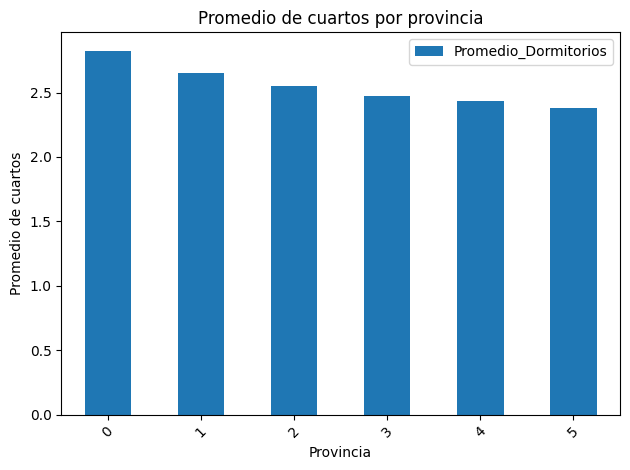

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

cuartos_por_prov.plot(kind='bar')

plt.title('Promedio de cuartos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Promedio de cuartos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 🧠 Interpretación

Por el grafico de barras notamos que la provincia del Azuy tiene mayor promedio de cuartos por habitación, eso quiere decir que hay casas con mas habitaciones que el resto de provincias. Puede tambien significar que las casas son mas grandes y que tienden a construir para aumentar sus habitaciones y por ende también la cantidad de personas que habitan la misma.

Sin embargo, se puede interpretar que tienen habitaciones para otros oficios como entretenimiento, almacenaje u otro motivo pero eso no nos dice el gráfico. La variación entre provincias esta entre 2.4 y 2.8 que es algo homogenea entre las provincias.

Tenemos buena estabilidad de vivienda en esas provincias según el grafico donde Bolívar con menor promedio solo indica que tiene viviendas más pequeñas que pueden interpretarse como diferencias socioeconomicas, viviendas muy básicas, etc.

En conclusión a la pregunta, Azuay es la que tiene mayor promedio y la menor es Bolívar.

## 🚀 5.2. ¿Cuál es el nivel de déficit habitacional en las zonas rurales y cómo se distribuye territorialmente?

Según el por el deficit habitacional que hicimos anteriormente vamos a realizar una analisis.

In [149]:
# Calculamos el déficit habitacional rural por provincia
deficit_rural = (
    df[
        (df['def_hab_deficithabit'] == 1) &
        (df['aur_areaurbanaorural'] == 2)
    ]
    .groupby('i01_provincia')
    .size()
    .reset_index(name='Cantidad_Viviendas_Deficit') # Convertimos a DataFrame con nombre claro
    .sort_values(by='Cantidad_Viviendas_Deficit', ascending=False)
)

# 2. Visualización mejorada
print("Provincias con mayor Déficit Habitacional en el Sector Rural:")
display(deficit_rural.style.bar(subset=['Cantidad_Viviendas_Deficit'], color='#FFA07A')
                     .set_caption("Análisis de vulnerabilidad habitacional rural"))

Provincias con mayor Déficit Habitacional en el Sector Rural:


,i01_provincia,Cantidad_Viviendas_Deficit
0,AZUAY,43221
5,COTOPAXI,38180
4,CHIMBORAZO,19861
3,CAÑAR,13404
1,BOLÍVAR,8711
2,CARCHI,7231


<Figure size 1000x600 with 0 Axes>

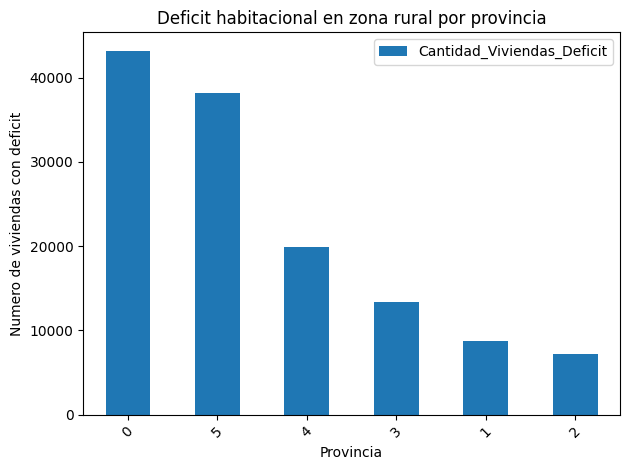

In [150]:
# Luego graficamos este deficit

plt.figure(figsize=(10,6))

deficit_rural.plot(kind='bar')

plt.title('Deficit habitacional en zona rural por provincia')
plt.xlabel('Provincia')
plt.ylabel('Numero de viviendas con deficit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 🧠 Interpretación

El gráfico de barras nos muestra el déficit habitacional por provincua que significa que hay mas población rural en la población. En Azuay se ve más condiciones de vivienda rural en la provincia. La concentración de la población rural que provoca calidad de vida menor o también puede significar menor disponibilidad de necesidades básicas como los servicios básicos, salud, alimentación, pero eso analizaremos luego.

En la provincia de Cotopaxi como segundo lugar tenemos algo similar que Azuay sin embargo en las provincias de Bolívar y Carchi se ve una disminución de la población rural.

Exiten varis factores dentro de este deficit pero no es un indice que se pueda medir con criterio profesional, es una forma de ver la población en las provincias que nos puede responder preguntas de la población rural en el país.

## 🚀 5.3. ¿Tienen servicios básicos?

En base la nueva columna que creamos anteriormente revisaremos que resultados nos da.

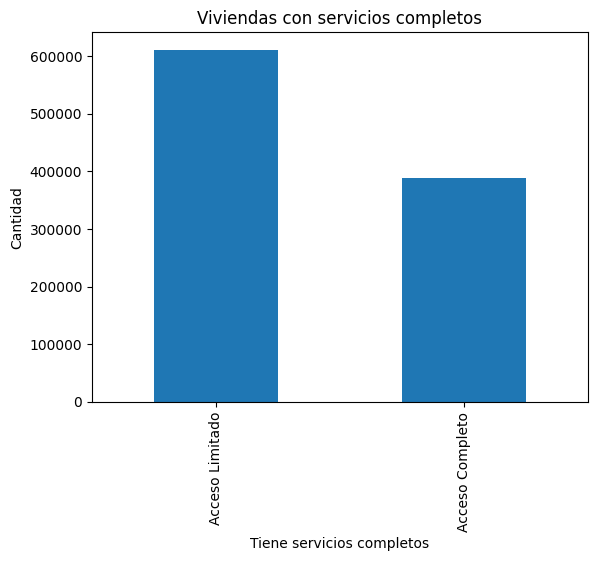

In [151]:
# Gráficamos el resultado
df['servicios_completos'].value_counts().plot(kind='bar')
plt.title('Viviendas con servicios completos')
plt.xlabel('Tiene servicios completos')
plt.ylabel('Cantidad')
plt.show()


### 🧠 Interpretación

En este gráfico nos muestra que al menos 610 mil viviendas no tiene servicios y eso es preocupante. Sin embargo, vamos a validarlo por provincia.

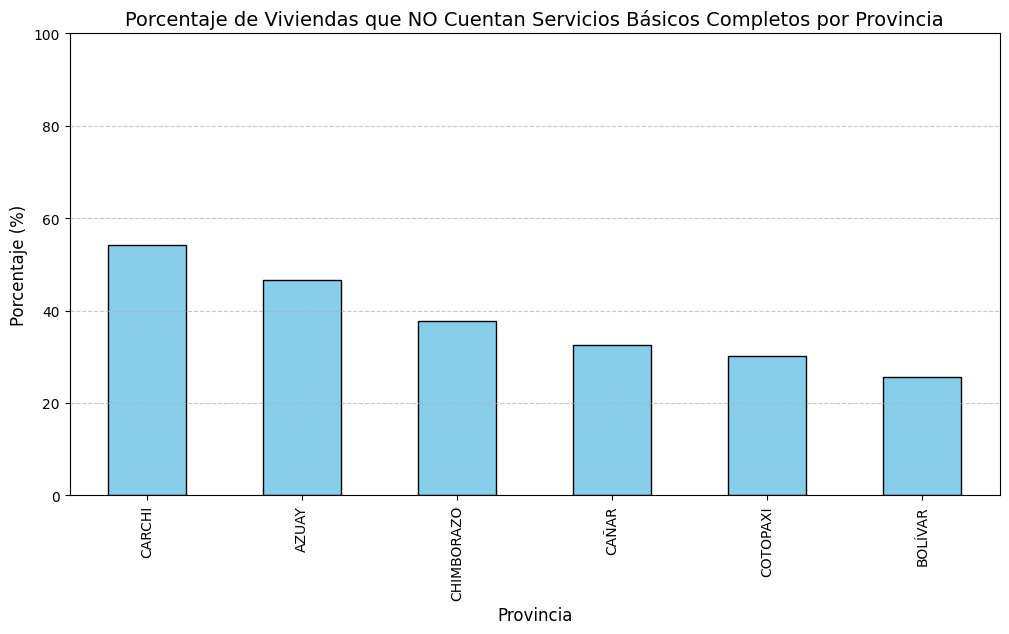

In [155]:
# Calculamos el promedio usando una lógica booleana rápida (True=1, False=0)
# Esto permite que el .mean() funcione y nos dé el porcentaje directamente
servicios_prov = (
    (df['servicios_completos'] == 'Acceso Completo') # Volvemos a evaluar como booleano
    .groupby(df['i01_provincia'])
    .mean()
    .sort_values(ascending=False) * 100
)

# Mejoramos el gráfico (añadiendo títulos y colores)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
servicios_prov.plot(kind='bar', color='skyblue', edgecolor='black')

# Añadimos etiquetas
plt.title('Porcentaje de Viviendas que NO Cuentan Servicios Básicos Completos por Provincia', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.ylim(0, 100) # El eje Y siempre debe ir de 0 a 100 para porcentajes
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

En este gráfico mas descriptivo tenemos que Carchi es la provincia con menor disponibilidad a servicios básicos que tenemos en este dataset. La provincia andina no es muy grande pero esto llega a tener alarmas por la cantidad de indisponiblidad de algo tan básico.


Sin embargo, consideremos que este gráfico tiene tres varibles que son la dispibilidad del agua, el acceso energía electrica y servicios higienicos. Esto llega a ser muy varible porque puede ser que tengan acceso alguna de las variables anteriores pero por no disponer alguna ya se vuelve una estadistica erronea. Considerar que exiten varias opciones en cada una de esas variables que si hacemos una analisis mas detallado podremos depurar este sesgo de resultados que es muy estricto a la agrupación inicial.


En conclusión, a partir de la tranformación realizada tenemos un resultado de que existe almenos 60% del dataset no tiene servicio básico donde principalmente Carchi y Azuay. Sin embargo, las varibles usadas para esa agrupación no determinan que sea la realidad porque existen muchas variables en cada columna que pueden interpretarse como si dispongan pero estamos siendo muy espcificos que puede causar una mala interpretación.

## 🚀 5.4. ¿Cómo se distribuyen las viviendas entre zona urbana y rural en cada provincia?

En base a la tabla de vivienda por provincia y area urbana/rural tenemos el siguiente gráfico:


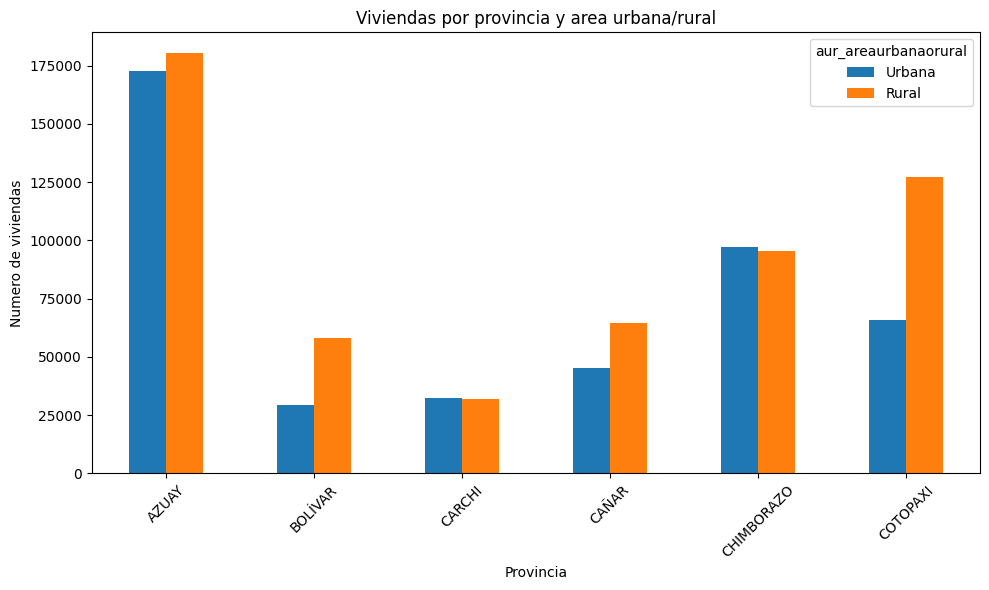

In [153]:
# Crearemos el gráfico a partir de la tabla creada anteriormente

tabla_area_r_u.plot(kind='bar', figsize=(10,6))

plt.title('Viviendas por provincia y area urbana/rural')
plt.xlabel('Provincia')
plt.ylabel('Numero de viviendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🧠 Interpretación

Segun el gráfico de barras tenemos una afirmación del análisis anteriormente realizado.

En la provincia de Azuay lidera la población rural respecto a la urbana mientras que Chimborazo es todo lo contrario donde la urbana es ligeramente dominante a la rural. Esto nos hace entender que descartando Chimborazo y Carchi el resto de provincias es dominante la población rural y da interpretación que su fuente de ingresos más probable es lo asociado a la agricultura y ganaderia.


Las condiciones rurales pueden ser favorables para esta población en un analisis mas profundo de acuerdo a las variables pero esto puede interpretarse como un sector productivo del país.

## 🚀 5.5. ¿Cómo varía el tamaño promedio de las viviendas (en número de cuartos) según el tipo de vivienda y la provincia?

En base al promedio de cuartos por provincia y tipo de vivienda tenemos el siguiente gráfico:


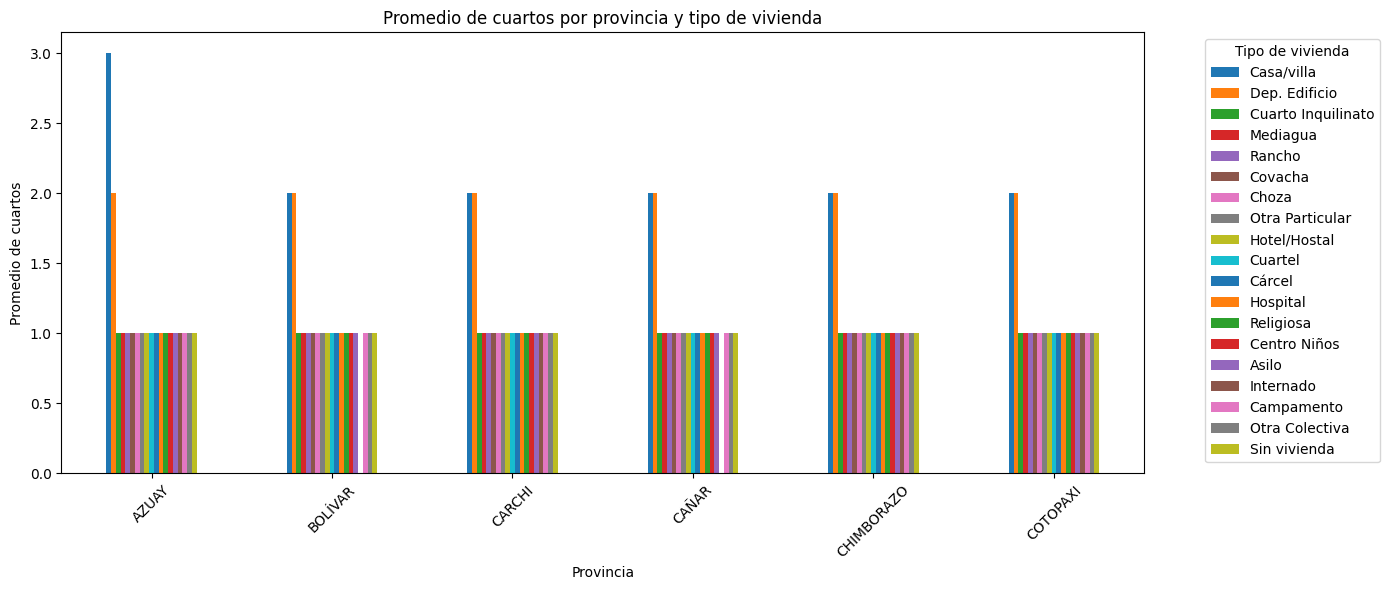

In [154]:
# Graficamos la tabla pivot del promedio

cuartos_por_prov_tipo_viv.plot(kind='bar', figsize=(14,6))

plt.title('Promedio de cuartos por provincia y tipo de vivienda')
plt.xlabel('Provincia')
plt.ylabel('Promedio de cuartos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de vivienda', bbox_to_anchor=(1.05,1))
plt.tight_layout()

plt.show()


### 🧠 Interpretación

Segun el gráfico de barras tenemos que el tipo de vivienda que mas prediminan son las casas sobre todo en la provincia del Azuay

En el resto de provincias tenemos una similitud en el resto de categorias de que almenos existe una de ese tipo de residencias que causa algo de confusion sobre la ruralidad. La cantidad limitada de las mismas puede ser clave para interpretar y continuar la afirmación de que es mas predominante la población rural.

Los departamentos en edificios entran tambien como punto fuerte en las provincia que hace entender que exite edificios de mas de 5 pisos para tener departamentos de arriendo.

En conclusión, tenemos que pueden existir edificios con departamentos disponibles para alquiler como vivienda y casas habitables donde las personas tiene muchas habitaciones segun los datos anteriores en la provincia del Azuay.

# 6️⃣  Fase 6: Conclusiones del proceso y análisis de datos

Agregue sus conclusiones, desarrollando un análisis integral de todo el proceso realizado.
En su reflexión, identifique y explique:
- ¿Qué aspectos del proceso fueron más aplicables o efectivos?
- ¿Cuáles fueron los elementos más complejos o desafiantes?

Sustente sus respuestas con argumentos claros y, de ser posible, con ejemplos derivados de su experiencia durante el desarrollo de la actividad.

## 🚀 6.1. ¿Qué aspectos del proceso fueron más aplicables o efectivos?


## ⭐ Respuesta

A nuestra opinión fue la extracción de los datos de una fuente del gobierno que es usada en estudios para los GAD. Esta información que permite evaluar diferentes aspectos de la población nos da más resultados de interpretación de algo tan concreto como el censo poblacional. La tendencia de predicción de estos resultados pueden ser ambigua pero cercana a la realidad si tuvieramos que realizarlo.

La información es desafiante de contruir porque tiene muchas variables que si no se realizan correctamente pueden provocar un error en los resultados de la transformación que quisieramos concluir. Se aprovecho el uso del dataset bastante variado y muy bien documentado para usarlo en este proyecto.

Tener la información muy bien documentada puede sesgar errores a futuro para realizar un analisis mas exhaustivo y preciso.



## 🚀 6.2. ¿Cuáles fueron los elementos más complejos o desafiantes?


## ⭐ Respuesta

El mayor reto fue escoger el conjunto de datos de la fuente que escogimos. El mayor conjunto de datos que existe es de 16 millones para el censo poblacional y nostros solo usamos una fracción del mismo para este trabajo. Además, el nivel de procesamiento de Colab tiene un limite y por eso tambien se limitó el conjunto de datos que disponiamos.

Las varibales que existen en cada columna del dataset, es decir, las opciones que tiene cada columna estan asociadas a un número pero luego se entiende como un dato mas cualitativo que cuantitativo y causa mucha confusión. Documentarse bien en la fuente oficial para resolver esas dudas ayudo mucho pero el tiempo fue limitado para este trabajo y se necesito extraer ciertos datos claves para el analisis final como las provincias, cantones, parroquias y las viviendas.

# 7️⃣ Fase 7: Aplicación al entorno profesional

## 🚀 Redacta una sección final de aplicación:
- Cada miembro del equipo colocara su nombre una explicación de como aplicaría
lo aprendido en esta semana en su entorno profesional.

# 🖥️ **Christian Carrera**

En mi trabajo no tengo mucho que sacar interpretaciones de datos pero si realizo mucho los pivots de datos de acuerdo a una base de datos. Este nuevo aprendizaje ayuda aprender criterios para realizarlo mas que la programación en si. Puedo aplicarlo en la creación de historias de usuario como en la evaluación critica del equipo a nivel de conocimiento.


En mi opinión esto me serviria más si tendria que evaluar datos a nivel de negocio lo cual casi no estoy involucrado. Pero el uso de python como lenguaje y el resto de funciones me ayudará mucho más en mi ejercicio profesional.

# **Alexander Luna**

Como desarrollador de software en el Registro de la Propiedad y Mercantil de Rumiñahui, este nuevo ejercicio con datos del INEC me aporta herramientas críticas para la estandarización de bases de datos masivas. La implementación de diccionarios para el mapeo de variables y la limpieza de valores nulos son directamente aplicables a la depuración de folios reales y registros catastrales, el análisis de la composición de viviendas mediante Python me permitirá desarrollar módulos de consulta más eficientes, mejorando la precisión en la clasificación de predios y apoyando la toma de decisiones basada en la realidad demográfica actualizada del cantón.

# **Romel Cerna**

Lo aprendido esta semana es altamente aplicable a mi rol como soporte de aplicaciones bancarias, ya que me permite consumir y validar APIs, analizar respuestas JSON y detectar errores de forma más rápida y precisa. El uso de pandas para limpiar y explorar datos facilita el análisis de logs y reportes operativos, ayudando a identificar inconsistencias y valores faltantes, mediante filtrado, agrupamiento y visualización de datos, puedo obtener insights relevantes, como patrones recurrentes de errores, aplicaciones con mayor incidencia o periodos de mayor impacto operativo. Estos insights permiten pasar de un soporte reactivo a uno más analítico y preventivo, aportando información clara para la toma de decisiones y la mejora continua de las aplicaciones.